# Ratings Data & Latent Dimensions

Today will be our final class focused on mental representations.

- Please work in **groups of two or more**.
- Move chairs together and discuss as you work.
- Commit and **show an instructor your work before leaving**.

In [6]:
# Run this cell first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

from tools import *

Previously we've been inferring spatial representations from similarity judgments. However, the information gained from such judgments can be sensitive to context. For example, stray dogs and cars, which are not very similar in general, may be thought of as more similar in contexts relating to potential danger.

The most popular alternative to similarity data is **ratings** data. For example, how *dangerous* on a scale from 0 to 10 is a car? Ratings data can be seen as the continuous version of feature norms, which we discussed in the previous lab on feature representations. Thus, ratings data is even more directly related to spatial representations, such as those inferred via NMDS. You can think of each kind of rating (e.g., how dangerous) as a different dimension of the space.

Researchers have used ratings for example to understand how the mind represents socially relevant information about faces, which we will explore today. The faces below are from a subset of 66 individuals/faces from the KDEF dataset (Lundqvist, D., Flykt, A., & Öhman, A., 1998). Participants rated each face on 13 different dimensions (e.g., how confident).

<img src="selected_faces/AF01NES.JPG" width="140"/>
<img src="selected_faces/AM01NES.JPG" width="140"/>
<img src="selected_faces/AF02NES.JPG" width="140"/>
<img src="selected_faces/AM02NES.JPG" width="140"/>
<img src="selected_faces/AF03NES.JPG" width="140"/>
<img src="selected_faces/AM03NES.JPG" width="140"/>

**Exercise:** Discuss with your partner which face (1-6) you think people rated as most:
- aggressive
- attractive
- caring
- confident
- dominant 
- emotionally stable
- intelligent 
- mean 
- responsible
- sociable 
- trustworthy 
- unhappy 
- weird

Try out your answers below.

In [7]:
# Each can be 1, 2, 3, 4, 5, or 6

answers = {
    'most_aggressive': 6,
    'most_attractive': 1,
    'most_caring': 1,
    'most_confident': 1,
    'most_dominant': 6,
    'most_emot_stable': 1,
    'most_intelligent': 1,
    'most_mean': 6,
    'most_responsible': 1,
    'most_sociable': 1,
    'most_trustworthy': 1,
    'most_unhappy': 4,
    'most_weird': 6
}

# don't change
incorrect = check_face_answers(answers)

All answers are correct! Great job!


In [8]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if len(incorrect) == 0:
    print('Test passed')
else:
    print('Test failed')

Test passed


Let's load the ratings data in the next cell.

The stimulus column shows the name of the face stimulus (66 total).

The remaining 13 columns provide average ratings. Each average rating is z-score normalized. That is, each column of ratings has a mean of 0 and standard deviation of 1. That means that the lowest ratings are negative numbers, and the highest ratings are positive numbers.

In [9]:
ratings = pd.read_csv('face_ratings.csv')
stim = ratings['stimulus'].copy()
ratings = ratings.drop(columns=['stimulus']).apply(zscore)
ratings['stimulus'] = stim
ratings

,aggressive,attractive,caring,confident,dominant,emot_stable,intelligent,mean,responsible,sociable,trustworthy,unhappy,weird,stimulus
0,-0.838576,2.150772,1.299035,1.241495,-0.240222,1.313222,0.881080,-0.485750,1.863745,1.670497,2.050984,-0.796445,-1.174697,AF01NES
1,-0.416323,0.112142,0.448366,-1.203330,-0.153719,-0.532231,-0.163642,-0.066824,-0.398276,-0.374984,-0.197564,0.961431,0.271219,AF02NES
2,-0.859174,-0.225465,1.006182,0.337651,-1.241176,-0.035868,-1.075934,-0.532297,0.056728,0.288781,0.278320,-0.369184,0.656796,AF03NES
3,-0.395726,-0.653967,0.016058,-0.581011,-0.437941,-0.264958,-0.987648,0.631387,-0.541278,-0.645909,-0.042902,0.692867,0.830306,AF04NES
4,-1.528599,0.501689,1.173527,0.219114,-0.833380,0.740495,0.733936,-0.776671,0.953736,0.830630,1.146806,-1.309159,-0.239671,AF05NES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,-1.013657,0.501689,1.048018,0.856250,-0.302009,1.835039,-0.045927,-1.114140,1.330740,1.196378,1.539410,-1.223707,-1.540996,AM31NES
62,-0.241243,-1.381121,-1.001956,-2.670224,-2.340991,-2.072229,-2.150085,-1.265418,-2.569297,-1.661876,-1.553830,1.608428,2.218385,AM32NES
63,1.643447,-1.043514,-1.992080,-0.447657,-0.005430,-1.041321,-0.104784,0.712845,-1.750289,-1.228397,-1.994022,1.034676,1.080932,AM33NES
64,1.921516,-0.121586,-0.778830,0.233931,1.551611,-0.595867,-0.193071,0.852487,-0.710279,-0.225976,-0.625858,1.388693,0.030233,AM34NES


Each of the 13 rating dimensions appear to measure something different about faces (e.g., confident vs. unhappy etc).

Let's look at a scatter plot of two of them.

**Exercise:** Discuss with your partner what relationship you see. What does that relationship imply for the measurement of these two variables?

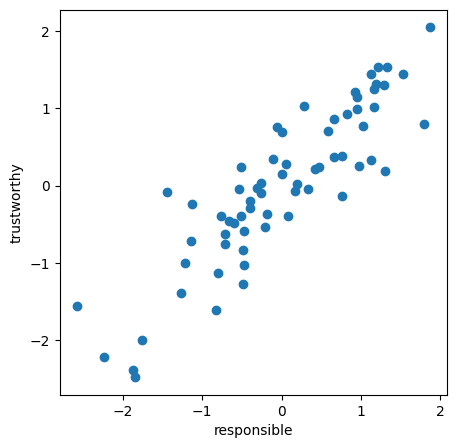

In [10]:
plt.figure(figsize=(5, 5))
plt.scatter(ratings['responsible'], ratings['trustworthy'])
plt.xlabel('responsible')
plt.ylabel('trustworthy')
plt.show()

The "responsible" and "trustworthy" dimensions are correlated. This indicates that they are probably measuring something similar. 

This is common in ratings data. It suggests that there may exist some single dimension representing faces that explains most of why we think they're both "responsible" and "trustworthy".

**Exercise:** Discuss with your partner what you think that single dimension is.

Were we to have a single dimension that could it explain the above data, we'd want it to capture as much of the variation in ratings among faces as possible. Variation is measured using variance.

**Exercise:** Create a function called `compute_variance` that takes a ratings dataframe and a column name and computes/returns the variance for the data in that column. Recall that variance is the average squared difference from the mean. Do not use premade functions like `np.var`. 

Before writing the function, **discuss with your partner** what you think the variance of each column should be without doing any calculation given that each column is normalized.

In [41]:
# Your code here
def compute_variance(ratings, col_name):
    mean = ratings[col_name].sum() / len(ratings[col_name])
    sq_diff = 0
    
    for item in ratings[col_name]:
        sq_diff += (mean - item) ** 2

    return sq_diff / len(ratings[col_name])


In [42]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(compute_variance(ratings, 'responsible'), 1.0):
    print('Test passed')
else:
    print('Test failed')

Test passed


The variance of the `responsible` column is 1 since the variable is z-score normalized:

In [35]:
responsibility_variance = compute_variance(ratings, 'responsible')
responsibility_variance

np.float64(1.0)

The same is true for `trustworthy`:

In [36]:
trustworthy_variance = compute_variance(ratings, 'trustworthy')
trustworthy_variance

np.float64(1.0000000000000002)

We want a single dimension that explains as much of the variance in the two above dimensions as possible. In other words, it must explain the **total variance**, which is the sum of the variances for both the `responsible` and `trustworthy` columns.

**Exercise:** Create a function called `compute_total_variance` that takes in a ratings dataframe and two column names and returns the total variance. Re-use your `compute_variance` function from above.

Before writing the function, **discuss with your partner** what you think the total variance will be without doing any calculation.

In [43]:
# Your code here

def compute_total_variance(ratings, col1, col2):
    return compute_variance(ratings, col1) + compute_variance(ratings, col2)

In [44]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(compute_total_variance(ratings, 'responsible', 'trustworthy'), 2.0):
    print('Test passed')
else:
    print('Test failed')

Test passed


The total variance is 2.0 as we'd expect:

In [45]:
total_variance = compute_total_variance(ratings, 'responsible', 'trustworthy')
total_variance

np.float64(2.0)

The amount of variance we can "explain" using a single dimension is called **variance explained**. It's just the variance of that single dimension divided by the total variance.

**Exercise:** Create a function called `compute_variance_explained` that takes in two numeric values representing variance (e.g., of a single dimension) and total variance and returns variance explained.

Before writing the function, **discuss with your partner** what you think the explained variance for responsible or trustworthy will be without doing any calculation.

In [46]:
# Your code here

def compute_variance_explained(var1, var2):
    return var1 / var2

In [47]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(compute_variance_explained(responsibility_variance, total_variance), 0.5):
    print('Test passed')
else:
    print('Test failed')

Test passed


We said we want a single dimension that explains as much of the variance in the two above dimensions as possible.

One way to do that is to just take one of the two dimensions and disregard the other, since they are correlated.

As you can see below, doing this only allows us to explain half of the total variance.

In [48]:
responsibility_explained = compute_variance_explained(responsibility_variance, total_variance)
responsibility_explained

np.float64(0.5)

In [49]:
trustworthy_explained = compute_variance_explained(trustworthy_variance, total_variance)
trustworthy_explained

np.float64(0.5000000000000001)

Can we do better than 0.5?

Taking one of the two features and throwing out the other can be thought of as projecting all of the points onto one of the dimensions.

For example, taking just the "responsible" dimension is the same as projecting points onto the x-axis and then computing variance.

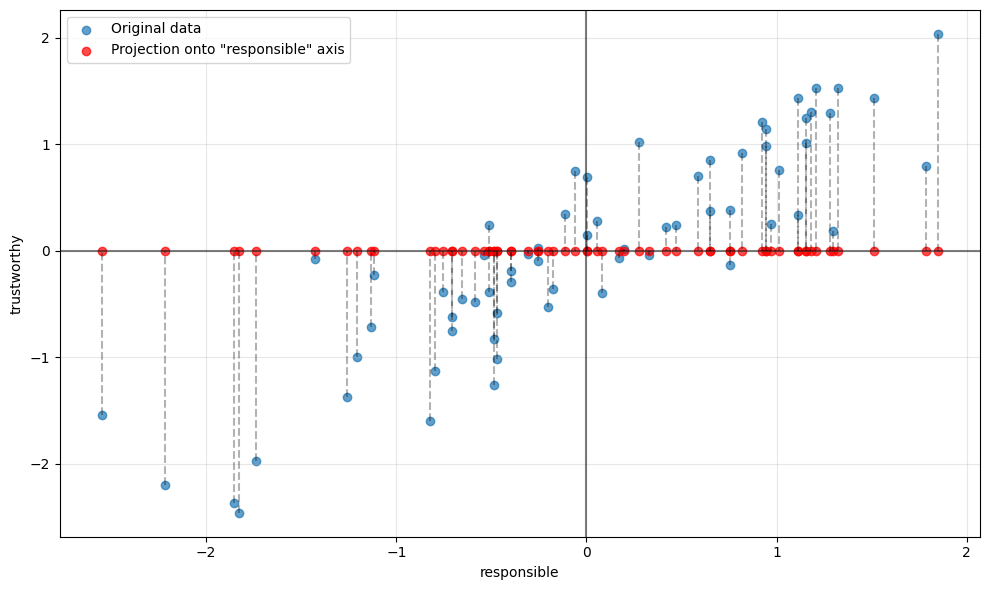

In [50]:
plot_projection_to_x(ratings)

After projecting the original (blue) dots onto the `responsible` dimension, they become the red dots. Notice that there is no variation in the red dots along the `trustworthy` dimension.

The red dots fall exactly on the flat line. This line is our *current* "single dimension" we mentioned above.

**Exercise:** Discuss with your partner what the equation of that flat line is.

Can we find a different line such that projections onto that line will result in variance explained greater than 0.5?

In order to answer this, we will need to be able to test out different lines and project our data points onto them.

Below is an example of the process of projecting a point onto a line. In this plot, we begin with a red dot. We want to project this dot onto the blue example line. To do this, we draw a line perpendicular to the original line starting at the original red point and ending at the projected (green) point on the line.

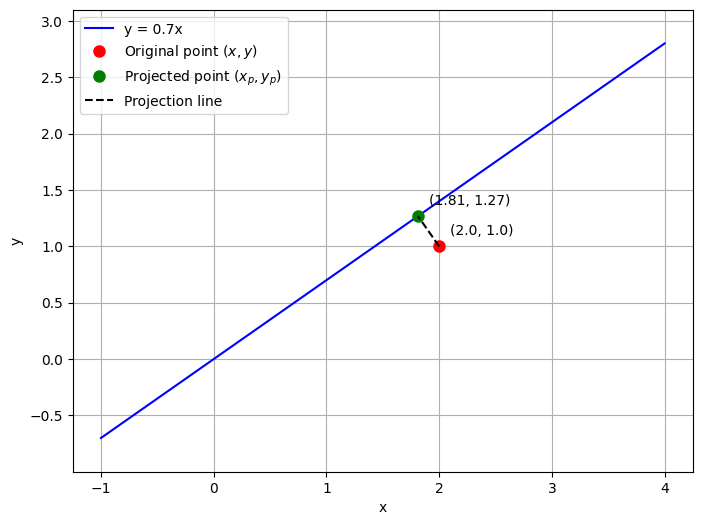

In [51]:
plot_single_point_projection()

Let's learn how to perform these projections.

Recall that the equation of a line is $y = mx + b$, where:
- $m$ is the slope of the line, and
- $b$ is the y-intercept of the line.

In our applications today, the intercept $b$ will always be 0. Thus, we have $y = mx$.

We want to project a point $(x, y)$ onto a line with equation $y = mx$. The projected point will be a new point $(x_p, y_p)$.

The $x_p$ coordinate of the projected point can be computed as: $x_p = (x + my) / (m^2 + 1)$.

Once we have $x_p$, we can just use the equation of the line to get $y_p = mx_p$.

**Exercise:** Create a function called `project_point_onto_line` that takes `x`, `y`, and `m`, and returns `x_p, y_p`. The function would work both when x/y are single numbers or numpy arrays.

In [52]:
# Your code here

def project_point_onto_line(x, y, m):
    x_p = (x + (m * y)) / (m**2 + 1)
    y_p = m * x_p
    return x_p, y_p

In [53]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
xps_, yps_ = project_point_onto_line(np.array([2, 2]), np.array([1, 1]), 0.7)
if np.allclose(xps_, np.array([1.81208054, 1.81208054]), atol=0.01) and np.allclose(yps_, np.array([1.26845638, 1.26845638]), atol=0.01):
    print('Test passed')
else:
    print('Test failed')

Test passed


**Exercise:** Use your new function to find the green projected point in the plot above.

In [56]:
xp_, yp_ = project_point_onto_line(2, 1, 0.7)

# don't change
print(xp_, yp_)

1.8120805369127517 1.2684563758389262


In [57]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(xp_, 1.8120805369127517, atol=0.01) and np.isclose(yp_, 1.2684563758389262, atol=0.01):
    print('Test passed')
else:
    print('Test failed')

Test passed


Previously we tried using `responsible` as our single dimension (horizontal line). We could also use `responsible` (vertical line), but the result is the same in terms of variance explained.

Let's try a line that's neither horizontal nor vertical, which is our only other option.

**Exercise:** Store the ratings for the `responsible` and `trustworthy` ratings columns in variables `x` and `y` respectively. Project the points onto a line with slope 0.5 and store the projected points in arrays `xp` and `yp`.

In [58]:
# Your code here

x = ratings['responsible']
y = ratings['trustworthy']
xp, yp = project_point_onto_line(x, y, 0.5)

In [59]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(x[0], 1.86, atol=0.01) and np.isclose(y[0], 2.05, atol=0.01) and np.isclose(xp[0], 2.31, atol=0.01) and np.isclose(yp[0], 1.16, atol=0.01):
    print('Test passed')
else:
    print('Test failed')

Test passed


Below is a visualization of the original blue points projected onto a line with slope 0.5. Each red point is one of the projected points.

Notice there is now at least some variation in the red points with respect to both the trustworthy and responsible dimensions even though we are only using a single dimension (the red line) to represent the data.

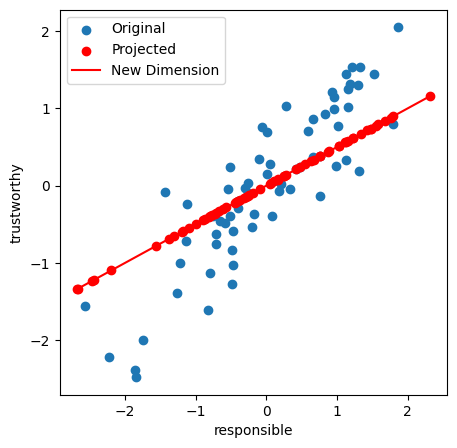

In [60]:
plt.figure(figsize=(5, 5))
plt.scatter(ratings['responsible'], ratings['trustworthy'], label='Original')
plt.scatter(xp, yp, color='red', label='Projected')
x_min, x_max = np.min(xp), np.max(xp)
y_min = x_min * 0.5
y_max = x_max * 0.5
plt.plot([x_min, x_max], [y_min, y_max], color='red', label='New Dimension')
plt.xlabel('responsible')
plt.ylabel('trustworthy')
plt.legend()
plt.show()

To calculate variance explained along our new (red) dimension, we need to know how to calculate variance in points along a slanted line.

Note that the center of our new dimension is 0 just like the other dimensions.

Now consider the example plot below. In this example, the slope of the line is 1 for simplicity. Let's say we want to know the position of the top right red dot on the red dimension. In order to move to this point from the origin, we must move one unit on the x dimension and one unit on the y dimension (black lines). Thus, the distance to the red point from the origin is the hypotenuse of a right triangle. By the pythagorean theorem, we know that this distance is $\sqrt{x_p^2 + y_p^2}$. Thus, the position of each point along the red dimension is its (signed) distance from the origin. The top-right red point is on the positive side of the dimension (trustworthy and responsible to some degree). The bottom-left red point is on the negative side (untrustworthy and not responsible to some degree). We can use the **sign** of $x_p$ to determine the direction. Putting everything together, the position of each point along the red line is $\text{sign}{(x_p)} \times \sqrt{x_p^2 + y_p^2}$.

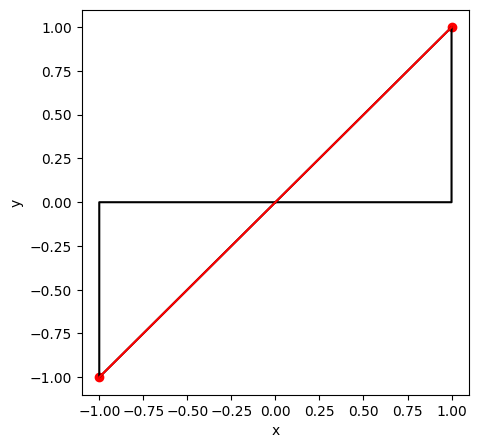

In [61]:
plot_triangles()

**Exercise:** Create a function called `compute_variance_along_line` that takes two arrays of projected points `xp` and `yp` and returns the variance along the dimension for which they vary. Use `np.var(signed_distances, ddof=0)` to compute variance.

In [73]:
# Your code here

def compute_variance_along_line(xp, yp):
    signed_distances = np.sign(xp) * np.sqrt(np.pow(xp,2) + np.pow(yp,2))
    return np.var(signed_distances, ddof=0)

In [74]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(compute_variance_along_line(xp, yp), 1.7066892686722224):
    print('Test passed')
else:
    print('Test failed')

Test passed


**Exercise:** Use your new functions to calculate variance explained using the new dimension. Store the result in `var_explained_by_new_dim`.

Before computing your result, **discuss with your partner** whether you expect the result to be better (higher) or worse (lower) than using a single rating dimension (e.g., trustworthy). Why do you have that expectation?

In [75]:
# Your code here

var_explained_by_new_dim = compute_variance_along_line(xp, yp) / total_variance

# don't change
var_explained_by_new_dim

np.float64(0.8533446343361112)

In [76]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(var_explained_by_new_dim, 0.8533446343361112):
    print('Test passed')
else:
    print('Test failed')

Test passed


0.85 is indeed larger than 0.5. The new single dimension is better than the original two single dimensions because it captures variation in both of the original dimensions.

Recall that the slope ($m=0.5$) we chose for our new dimension was just an example.

We want to find the slope of the single dimension that **maximizes** variance explained.

**Exercise:** Write a loop to evaluate variance explained for 200 different slopes in the range 0-2 (`np.linspace(0, 2, 200)`). Store the variance explained values for each slope in an array called `explained_per_slope`.

In [77]:
# do not change
slopes_to_try = np.linspace(0, 2, 200)

# Your code here
explained_per_slope = []
for m in slopes_to_try:
    xp, yp = project_point_onto_line(x, y, m)
    explained_per_slope.append(compute_variance_along_line(xp, yp) / total_variance)


In [78]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(slopes_to_try[np.argmax(explained_per_slope)], 1.0050251256281406):
    print('Test passed')
else:
    print('Test failed')

Test passed


Below is a plot of explained variance against slope.

**Exercise:** Discuss with your partner which slope is approximately the "best" and why?

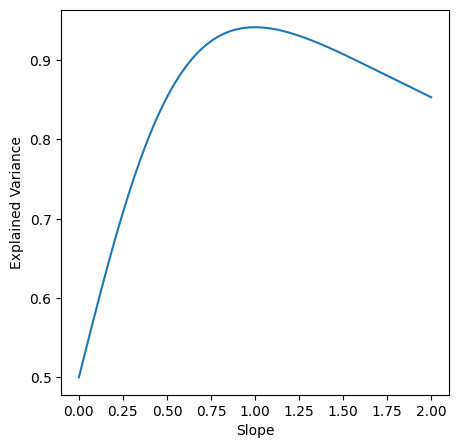

In [79]:
plt.figure(figsize=(5, 5))
plt.plot(slopes_to_try, explained_per_slope)
plt.xlabel('Slope')
plt.ylabel('Explained Variance')
plt.show()

The highest variance explained value was:

In [80]:
highest_var_explained = np.max(explained_per_slope)
highest_var_explained

np.float64(0.9416752442361664)

The slope corresponding the highest variance explained value was:

In [81]:
slopes_to_try[np.argmax(explained_per_slope)]

np.float64(1.0050251256281406)

Below is a visualization of this best single dimension that maximizes variance explained.

Notice that it fits the data well. However, note that this line is not the same as the least squares line used in regression. We will explore this idea further in a later assignment.

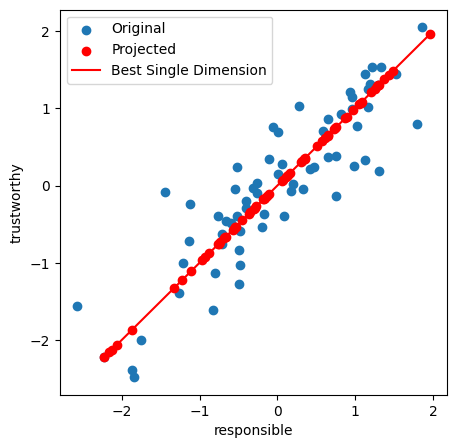

In [82]:
xp, yp = project_point_onto_line(x, y, 1.0)

plt.figure(figsize=(5, 5))
plt.scatter(ratings['responsible'], ratings['trustworthy'], label='Original')
plt.scatter(xp, yp, color='red', label='Projected')
x_min, x_max = np.min(xp), np.max(xp)
y_min = x_min
y_max = x_max
plt.plot([x_min, x_max], [y_min, y_max], color='red', label='Best Single Dimension')
plt.xlabel('responsible')
plt.ylabel('trustworthy')
plt.legend()
plt.show()

The dimension discovered above is called the **first principal component (PC1)** and the procedure we used to obtain it is called **Principal Component Analysis (PCA)**.

What does this new dimension mean? It's tempting to assume that "trustworthy" and "responsible" are measuring exactly the same thing. However, you can confirm in the original data that "trustworthy" is also correlated with "attractive", the latter of which has nothing to do with "responsible". What dimension captures both a large part of "trustworthy" and a large part of "responsible". It could be capturing something such as "social dependability". Such interpretations are left up to the researcher. In any case, we might assume that the participants use this shared dimension from their minds in large part to answer questions both about "trustworthy" and "responsible".

We can also think of this new dimension (PC1) as a prediction line that helps us predict both x from y and y from x. What is the error in the predictions we are making?

We can measure these errors, called **residuals**, by subtracting our projected points ($x_p$, $y_p$) from the original points ($x$, $y$). That is, what variation in our data is left when we remove the variation we've already explained using PC1 (i.e., when we remove variation along PC1)?

**Exercise:** Write a function called `compute_residuals` that takes arrays `x`, `y`, `x_p`, `y_p`, and returns arrays of residuals `x_res` and `y_res`.

In [83]:
# Your code here
def compute_residuals(x, y, x_p, y_p):
    x_res = x - x_p
    y_res = y - y_p
    return x_res, y_res


In [84]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
x_res_, y_res_ = compute_residuals(x, y, xp, yp)
if np.isclose(x_res_[0], -0.09361975, atol=0.01) and np.isclose(y_res_[0], 0.09361975, atol=0.01):
    print('Test passed')
else:
    print('Test failed')

Test passed


Let's plot the residuals (original data with variation along PC1 removed) as green points.

**Exercise:** Discuss with your partner why you think the green points form the pattern that they do.

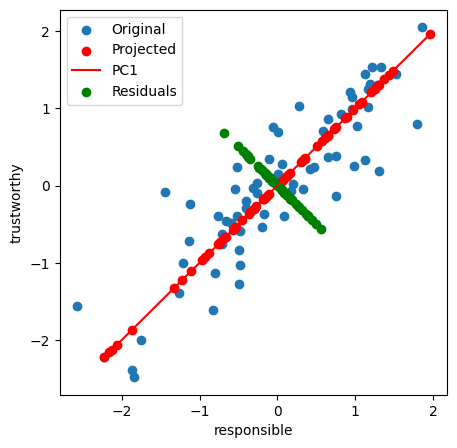

In [85]:
# projections
xp, yp = project_point_onto_line(x, y, 1.0)

# residuals
x_res, y_res = compute_residuals(x, y, xp, yp)

plt.figure(figsize=(5, 5))
plt.scatter(ratings['responsible'], ratings['trustworthy'], label='Original')
plt.scatter(xp, yp, color='red', label='Projected')
x_min, x_max = np.min(xp), np.max(xp)
y_min = x_min
y_max = x_max
plt.plot([x_min, x_max], [y_min, y_max], color='red', label='PC1')
plt.scatter(x_res, y_res, color='green', label='Residuals')
plt.xlabel('responsible')
plt.ylabel('trustworthy')
plt.legend()
plt.show()

Remember, when looking at residuals, we are removing variation along the red line. That means all points move to the mean along PC1 (the center of the red PC1 dimension).

The remaining variation is thus along a new dimension that is perpendicular to PC1. This second dimension is called the **second principal component (PC2)**.

There are as many PCs as we have original columns in our data, and PCs will always be perpendicular.

**Exercise:** Calculate the variance along PC2 and store the result in `var_explained_by_PC2`.

In [86]:
# Your code here
var_explained_by_PC2 = compute_variance_along_line(x_res, y_res) / total_variance


# don't change
var_explained_by_PC2

np.float64(0.05831920707986091)

In [87]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(var_explained_by_PC2, 0.05831920707986091):
    print('Test passed')
else:
    print('Test failed')

Test passed


**Exercise:** Compute the total variance for PC1 and PC2 and store the result in `total_for_PC1_and_PC2`.

Before your calculation, **discuss with your partner** what you think the result should be.

In [91]:
# Your code here

total_for_PC1_and_PC2 = highest_var_explained + var_explained_by_PC2

# do not change
total_for_PC1_and_PC2

np.float64(0.9999944513160274)

In [92]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(total_for_PC1_and_PC2, 1.0):
    print('Test passed')
else:
    print('Test failed')

Test passed


We began with two dimensions that made up the total variance (1.0), and we've ended with two new dimensions (PC1 and PC2) that also add up to 1.0.

However, there are important differences. The original two dimensions both explained 50% of the total variance. However, in the case of the new dimensions, PC1 explains ~94% of the total variance, and PC2 explains much less: ~6%. Further, the original two dimensions were correlated, whereas the two new dimensions are not (they are perpendicular).

PC1 is what we are most interested in. It captures most of the variation in both sets of ratings (trustworthy and responsible). But PC2 is also interesting. It captures variation not captured by PC1, such as aspects of trustworthiness that aren't related to responsibility, like attractiveness.

PCA can be performed with more than just two dimensions. In a future homework assignment, we will explore PCs that explain the full set of the ratings in this dataset.

**References**

Lundqvist, D., Flykt, A., & Öhman, A. (1998). The Karolinska Directed Emotional Faces – KDEF, CD ROM from Department of Clinical Neuroscience, Psychology section, Karolinska Institutet, ISBN 91-630-7164-9.